### Librerias

In [2]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
pd.options.display.max_columns=None

### Datos

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
df = pd.concat([train, test], axis = 0).reset_index(drop=True)

In [5]:
df.shape

(2919, 81)

### Tratamiento

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.drop("Id" , axis=1)

In [8]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,G

In [9]:
df.isnull().sum().sum()

15424

In [10]:
train.shape

(1460, 81)

In [11]:
train.isnull().sum().sum()

6965

In [12]:
test.shape

(1459, 80)

In [13]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<Axes: >

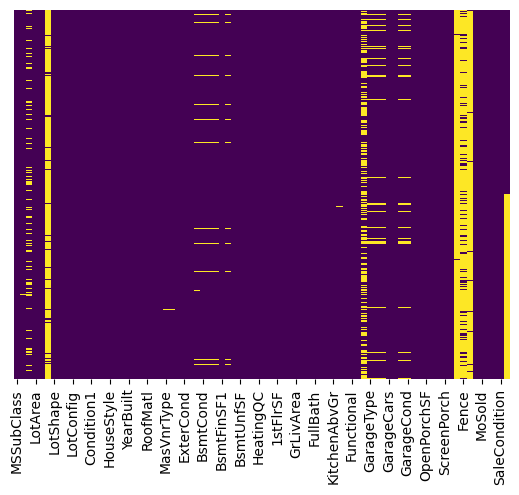

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
missing_data = pd.isnull(test).sum()
missing_data_percentage = missing_data/len(test)*100 #Calculamos el % del los datos faltantes en cada columna
nulos_totales= missing_data_percentage.sort_values(ascending = False) #Ordenamos de mayor a menor
nulos_totales = pd.DataFrame(nulos_totales,columns=["% nulos"])
nulos_totales.T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageQual,GarageFinish,GarageCond,GarageType,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,MasVnrType,MasVnrArea,MSZoning,BsmtHalfBath,Utilities,Functional,BsmtFullBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,KitchenQual,TotalBsmtSF,Exterior2nd,GarageCars,Exterior1st,GarageArea,SaleType,MiscVal,BedroomAbvGr,KitchenAbvGr,YrSold,TotRmsAbvGrd,MoSold,Fireplaces,PoolArea,HalfBath,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,PavedDrive,Id,HeatingQC,FullBath,GrLivArea,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,MSSubClass,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,SaleCondition
% nulos,99.79438,96.504455,92.66621,80.123372,50.03427,15.558602,5.346127,5.346127,5.346127,5.346127,5.209047,3.084304,3.015764,3.015764,2.878684,2.878684,1.096642,1.028101,0.27416,0.13708,0.13708,0.13708,0.13708,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
missing_data = pd.isnull(train).sum()
missing_data_percentage = missing_data/len(train)*100 #Calculamos el % del los datos faltantes en cada columna
nulos_totales= missing_data_percentage.sort_values(ascending = False) #Ordenamos de mayor a menor
nulos_totales = pd.DataFrame(nulos_totales,columns=["% nulos"])
nulos_totales.T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical,Id,Functional,Fireplaces,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,TotRmsAbvGrd,GarageCars,GrLivArea,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtFullBath,HeatingQC,LowQualFinSF,LandSlope,OverallQual,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LotConfig,YearBuilt,Utilities,LandContour,LotShape,Street,LotArea,MSZoning,OverallCond,YearRemodAdd,2ndFlrSF,BsmtFinSF2,1stFlrSF,CentralAir,MSSubClass,Heating,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
% nulos,99.520548,96.30137,93.767123,80.753425,47.260274,17.739726,5.547945,5.547945,5.547945,5.547945,5.547945,2.60274,2.60274,2.534247,2.534247,2.534247,0.547945,0.547945,0.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
missing_data = pd.isnull(df).sum()
missing_data_percentage = missing_data/len(df)*100 #Calculamos el % del los datos faltantes en cada columna
nulos_totales= missing_data_percentage.sort_values(ascending = False) #Ordenamos de mayor a menor
nulos_totales = pd.DataFrame(nulos_totales,columns=["% nulos"])
nulos_totales.T

,PoolQC,MiscFeature,Alley,Fence,SalePrice,FireplaceQu,LotFrontage,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrType,MasVnrArea,MSZoning,BsmtHalfBath,Utilities,BsmtFullBath,Functional,Exterior2nd,Exterior1st,GarageArea,GarageCars,SaleType,KitchenQual,BsmtFinSF1,Electrical,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,TotRmsAbvGrd,Fireplaces,SaleCondition,PavedDrive,MoSold,YrSold,WoodDeckSF,MiscVal,PoolArea,ScreenPorch,3SsnPorch,BedroomAbvGr,EnclosedPorch,OpenPorchSF,KitchenAbvGr,MSSubClass,HalfBath,OverallCond,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,FullBath,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,CentralAir
% nulos,99.657417,96.402878,93.216855,80.438506,49.982871,48.646797,16.649538,5.447071,5.447071,5.447071,5.447071,5.378554,2.809181,2.809181,2.774923,2.740665,2.706406,0.822199,0.787941,0.137033,0.068517,0.068517,0.068517,0.068517,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,G

In [19]:
df['SalePrice']= df['SalePrice'].fillna(value=0)

In [20]:
def remove_null(df, thr_perc):
    threshold_na = len(df) * thr_perc 
    df = df.dropna(thresh=threshold_na, axis=1)
    return df

df = remove_null(df,0.8)

<Axes: >

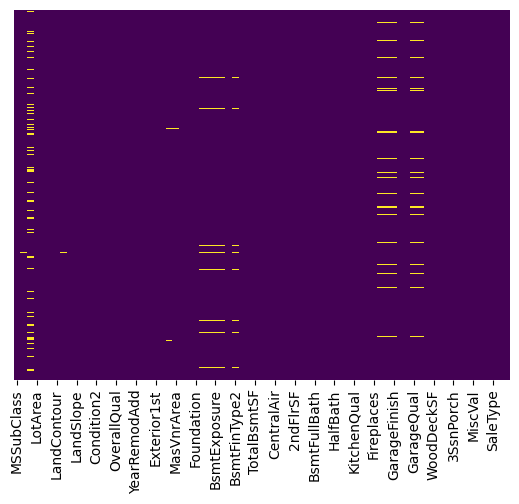

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
#comprobamos si quedan columnas con mas del 80% de los datos nulos
missing_data = pd.isnull(df).sum()
missing_data_percentage = missing_data/len(df)*100 #Calculamos el % del los datos faltantes en cada columna
nulos_totales= missing_data_percentage.sort_values(ascending = False) #Ordenamos de mayor a menor
nulos_totales = pd.DataFrame(nulos_totales,columns=["% nulos"])
nulos_totales.T

,LotFrontage,GarageCond,GarageYrBlt,GarageFinish,GarageQual,GarageType,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrType,MasVnrArea,MSZoning,BsmtFullBath,Functional,BsmtHalfBath,Utilities,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GarageArea,SaleType,Electrical,KitchenQual,Exterior2nd,Exterior1st,GarageCars,BsmtFinSF2,KitchenAbvGr,BedroomAbvGr,HalfBath,TotRmsAbvGrd,YrSold,SaleCondition,PavedDrive,MoSold,MiscVal,PoolArea,ScreenPorch,Fireplaces,3SsnPorch,EnclosedPorch,OpenPorchSF,FullBath,WoodDeckSF,MSSubClass,Heating,GrLivArea,OverallQual,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,LowQualFinSF,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,SalePrice
% nulos,16.649538,5.447071,5.447071,5.447071,5.447071,5.378554,2.809181,2.809181,2.774923,2.740665,2.706406,0.822199,0.787941,0.137033,0.068517,0.068517,0.068517,0.068517,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def transformar_variables(df):
    mediana_cols = []
    moda_cols = []
    media_cols = []

    for col in df.columns:
        if df[col].dtype == 'float64':
            media_cols.append(col)
        elif df[col].dtype == 'int64':
            mediana_cols.append(col)
        else:
            moda_cols.append(col)

    for col in mediana_cols:
        df[col].fillna(df[col].median(), inplace=True)
    for col in moda_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    for col in media_cols:
        df[col].fillna(df[col].mean(), inplace=True)

    return df

df = transformar_variables(df)



/tmp/ipykernel_5635/291115073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_5635/291115073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_5635/291115073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_5635/291115073.py:15: SettingWithC

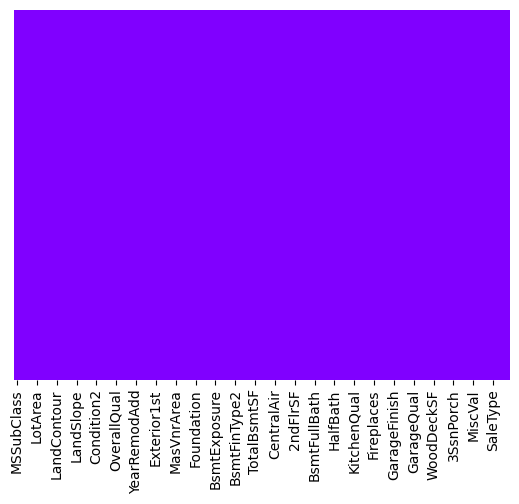

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='rainbow')
df2 = df.copy()

In [25]:
""" from scipy.stats import skew (Ejemplo avanzado de posible camino )

def imputar_valores(df, umbral_sesgo=0.5):
    for col in df.columns:
        # Solo queremos imputar las columnas numéricas
        if np.issubdtype(df[col].dtype, np.number):
            sesgo = skew(df[col].dropna())
            if abs(sesgo) < umbral_sesgo:
                # Si la distribución es bastante simétrica, usamos la media
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                # Si la distribución está sesgada, usamos la mediana
                df[col].fillna(df[col].median(), inplace=True)
        else:
            # Para las variables no numéricas, usamos la moda
            df[col].fillna(df[col].mode().values[0], inplace=True)

    return df

df = imputar_valores(df) """


' from scipy.stats import skew (Ejemplo avanzado de posible camino )\n\ndef imputar_valores(df, umbral_sesgo=0.5):\n    for col in df.columns:\n        # Solo queremos imputar las columnas numéricas\n        if np.issubdtype(df[col].dtype, np.number):\n            sesgo = skew(df[col].dropna())\n            if abs(sesgo) < umbral_sesgo:\n                # Si la distribución es bastante simétrica, usamos la media\n                df[col].fillna(df[col].mean(), inplace=True)\n            else:\n                # Si la distribución está sesgada, usamos la mediana\n                df[col].fillna(df[col].median(), inplace=True)\n        else:\n            # Para las variables no numéricas, usamos la moda\n            df[col].fillna(df[col].mode().values[0], inplace=True)\n\n    return df\n\ndf = imputar_valores(df) '

### Recuperación de valores de prices con KNN

/tmp/ipykernel_5635/2988589275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SalePrice.replace({0: np.nan}, inplace = True) #Cambiar 0's por nan
/tmp/ipykernel_5635/2988589275.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'] , fit=stats.norm);


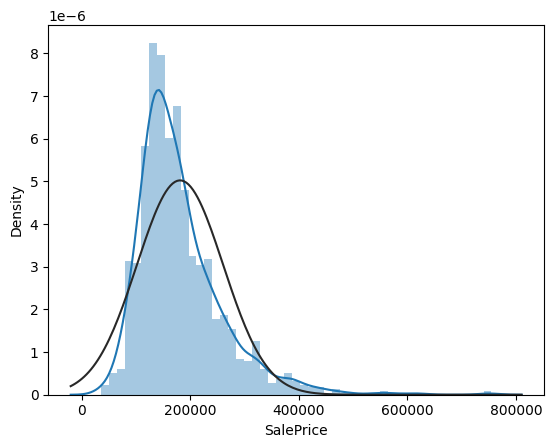

In [26]:
from scipy import stats #Muestra para hacer lineas de regresion
#Convertimos los 0 de Salesprices en nulos
df.SalePrice.replace({0: np.nan}, inplace = True) #Cambiar 0's por nan
sns.distplot(df['SalePrice'] , fit=stats.norm);


In [27]:
df.isnull().sum().sort_values(ascending = False)

SalePrice       1459
GarageYrBlt        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
                ... 
MasVnrArea         0
MasVnrType         0
Exterior2nd        0
Exterior1st        0
Heating            0
Length: 75, dtype: int64

In [28]:
"""from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

def preprocess(df):
    # Identificamos las columnas numéricas y categóricas
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = df.select_dtypes(include=['object']).columns

    # Creamos el transformador de columnas con los procesadores
    preprocessor = make_column_transformer(
        (StandardScaler(), numeric_features),
        (OneHotEncoder(), categorical_features),
    )

    # Creamos un pipeline que aplica el preprocesador
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Aplicamos el pipeline al dataframe
    df_processed = pipeline.fit_transform(df)
    
    return df_processed, pipeline

# Uso de la función
df_processed, pipeline = preprocess(df)"""
#EJEMPLO AVANZADO DE TRANSFORMACIÓN Y GUARDADO DE LA MISMA PARA POSTERIOR RECUPERACIÓN 


"from sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.compose import make_column_transformer\nfrom sklearn.pipeline import Pipeline\n\ndef preprocess(df):\n    # Identificamos las columnas numéricas y categóricas\n    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns\n    categorical_features = df.select_dtypes(include=['object']).columns\n\n    # Creamos el transformador de columnas con los procesadores\n    preprocessor = make_column_transformer(\n        (StandardScaler(), numeric_features),\n        (OneHotEncoder(), categorical_features),\n    )\n\n    # Creamos un pipeline que aplica el preprocesador\n    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])\n\n    # Aplicamos el pipeline al dataframe\n    df_processed = pipeline.fit_transform(df)\n    \n    return df_processed, pipeline\n\n# Uso de la función\ndf_processed, pipeline = preprocess(df)"

In [29]:
df.isnull().sum().sort_values(ascending = False).head(25)

SalePrice        1459
GarageYrBlt         0
Fireplaces          0
Functional          0
TotRmsAbvGrd        0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
GrLivArea           0
LowQualFinSF        0
2ndFlrSF            0
1stFlrSF            0
Electrical          0
GarageType          0
GarageFinish        0
HeatingQC           0
GarageCars          0
SaleCondition       0
SaleType            0
YrSold              0
MoSold              0
dtype: int64

In [30]:
from sklearn.impute import KNNImputer
import numpy as np

def impute_with_knn_and_median(data, target_column, k_neighbors=5):
    imputer = KNNImputer(n_neighbors=k_neighbors)
    data_imputed = imputer.fit_transform(data)    
    column_index = data.columns.get_loc(target_column)
    column_median = np.median(data_imputed[:, column_index][data_imputed[:, column_index] != 0])
    data_imputed[:, column_index] = np.where(data_imputed[:, column_index] == 0, column_median, data_imputed[:, column_index])
    data[target_column] = data_imputed[:, column_index]
    return data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.columns[df_encoded.dtypes == 'object']:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
imputed_data = impute_with_knn_and_median(df_encoded, 'SalePrice', k_neighbors=5)



In [31]:
df['SalePrice'] = df_encoded['SalePrice']

/tmp/ipykernel_5635/1004246646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SalePrice'] = df_encoded['SalePrice']


In [32]:
import scipy.stats as stats
numeric_vars = df.select_dtypes(include = ['int64', 'float64'])
skewed_feats = numeric_vars.apply(lambda x: stats.skew(x.dropna()) if np.issubdtype(x.dtype, np.number) else np.nan).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.T

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,BsmtHalfBath,MasVnrArea,OpenPorchSF,WoodDeckSF,SalePrice,LotFrontage,1stFlrSF,BsmtFinSF1,MSSubClass,GrLivArea,TotalBsmtSF,BsmtUnfSF,2ndFlrSF,TotRmsAbvGrd,Fireplaces,HalfBath,BsmtFullBath,OverallCond,BedroomAbvGr,GarageArea,OverallQual,MoSold,FullBath,YrSold,GarageCars,GarageYrBlt,YearRemodAdd,YearBuilt
Skew,21.947195,16.898328,12.822431,12.088761,11.376065,4.302254,4.146034,4.003891,3.946694,3.931343,2.611549,2.535114,1.842433,1.71656,1.645574,1.469604,1.425233,1.375457,1.269358,1.162484,0.919508,0.861675,0.758367,0.733495,0.694566,0.623955,0.570312,0.326324,0.241218,0.19711,0.195884,0.167606,0.132399,-0.218298,-0.39279,-0.45102,-0.599806


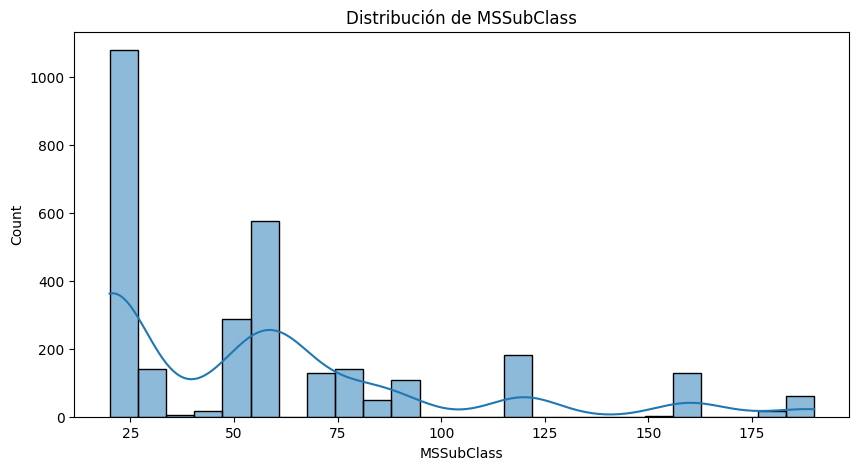

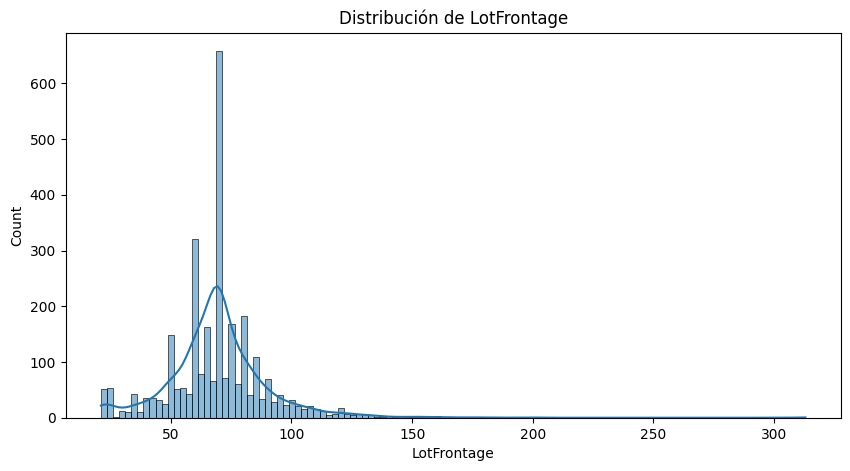

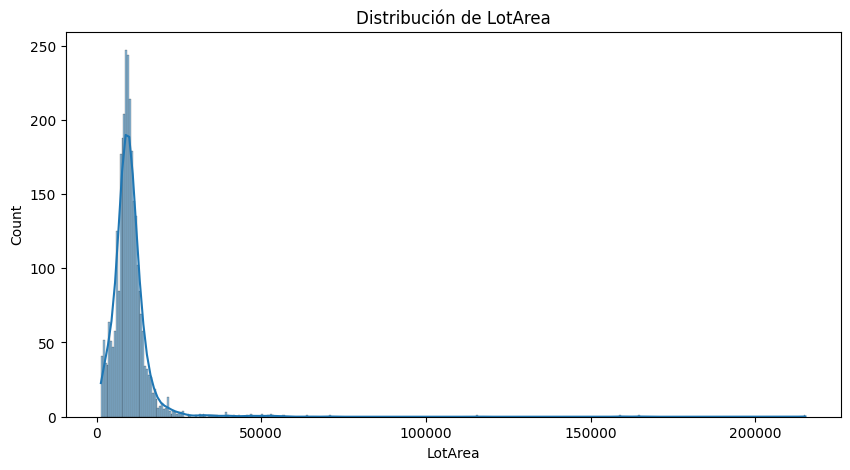

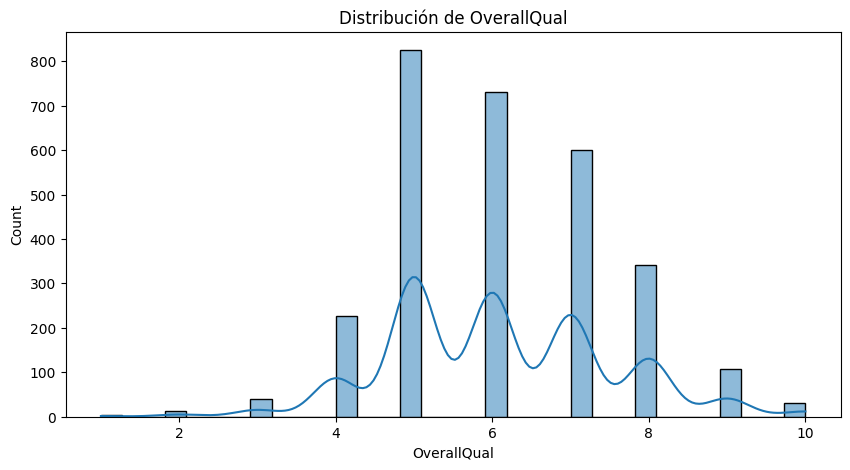

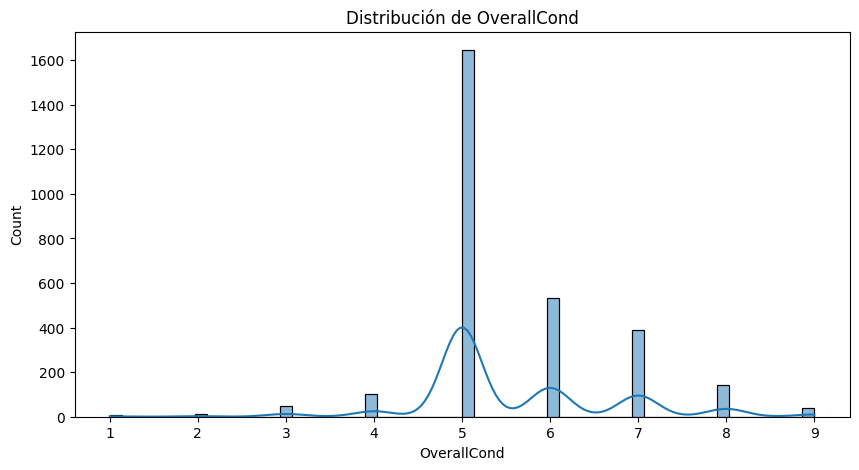

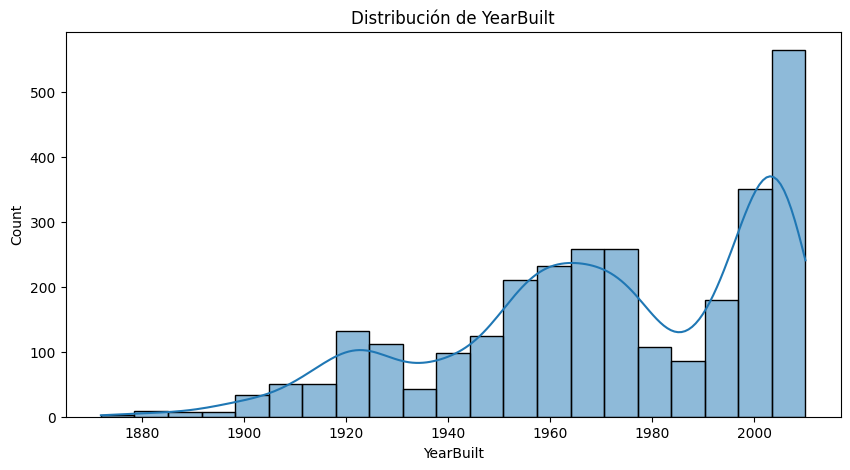

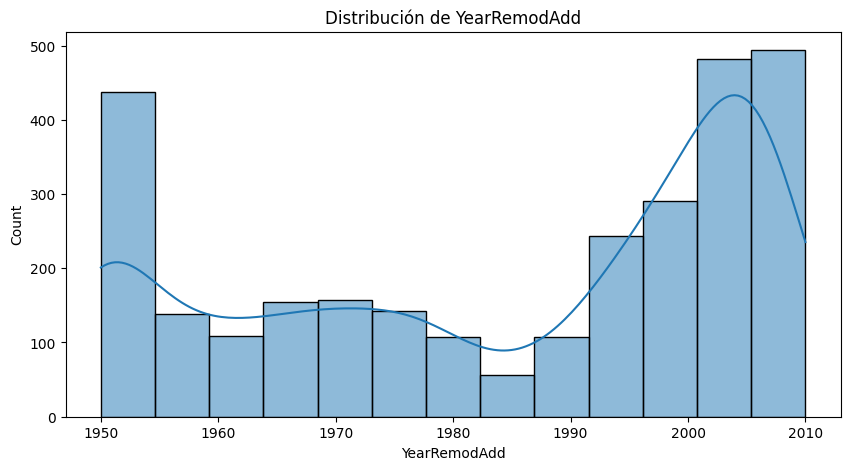

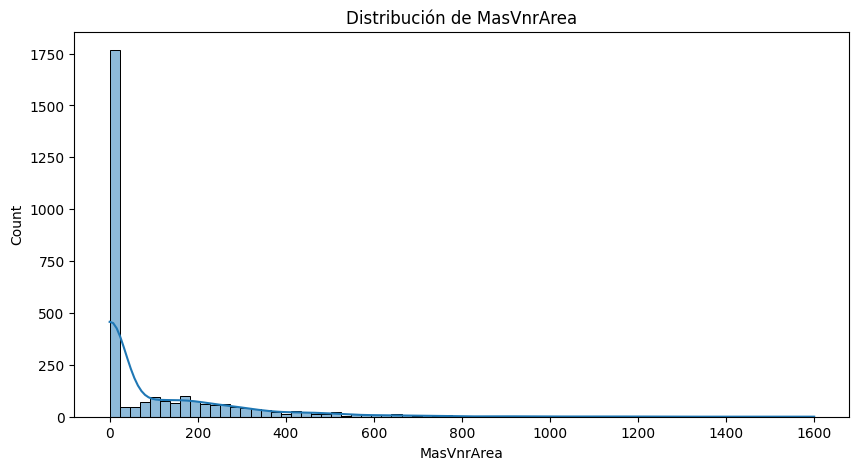

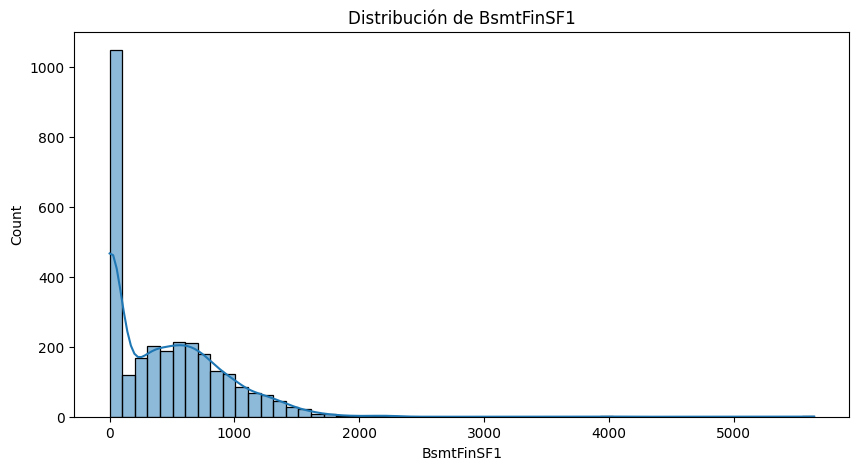

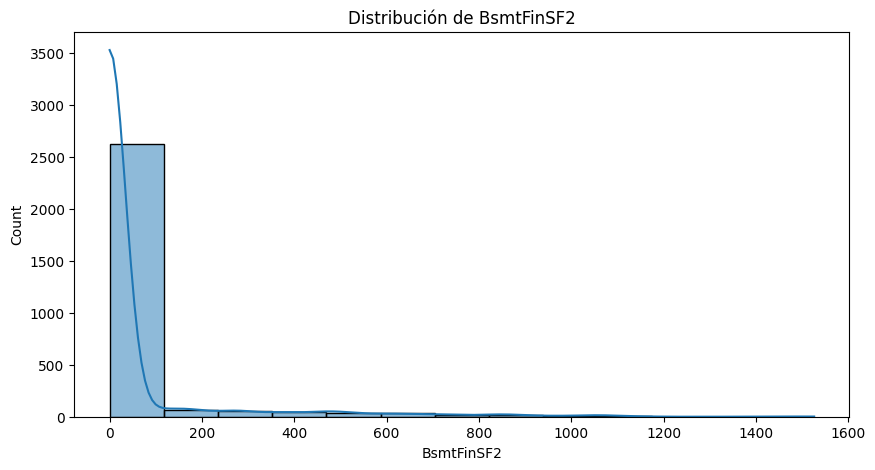

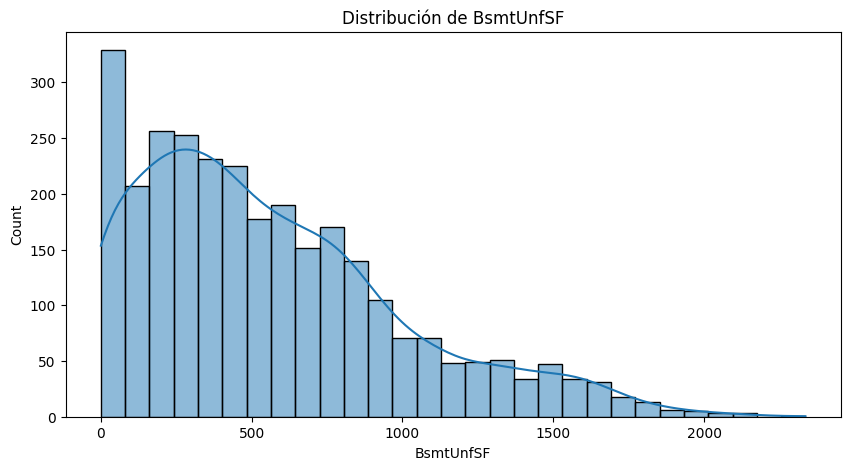

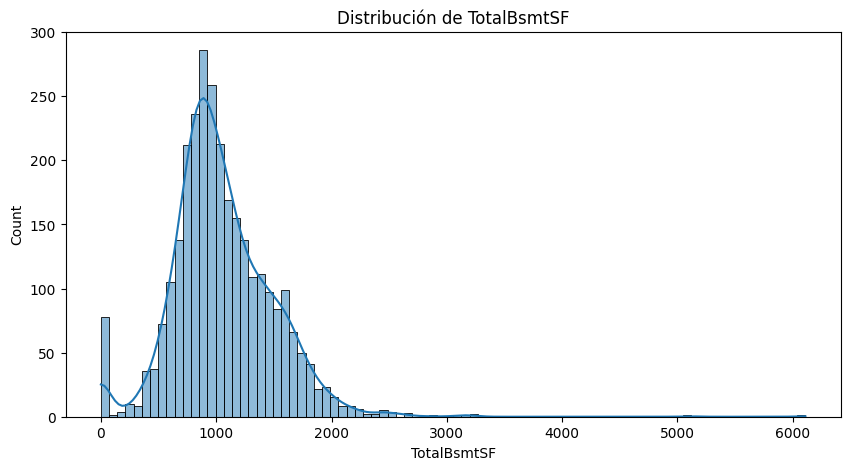

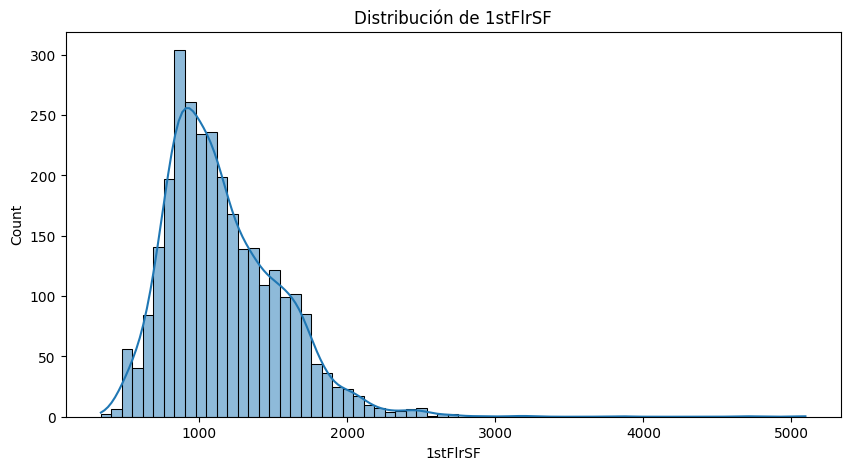

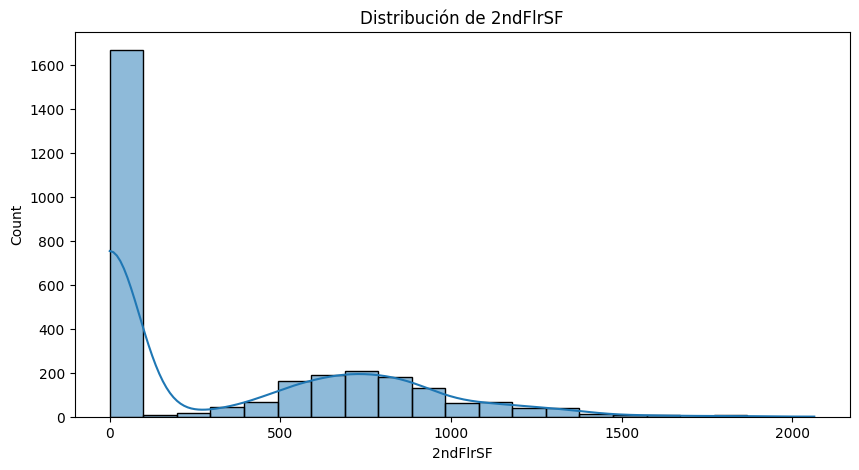

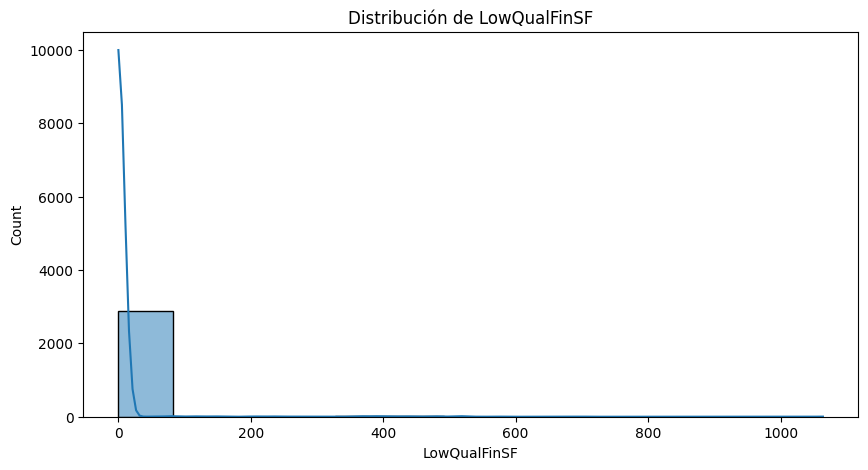

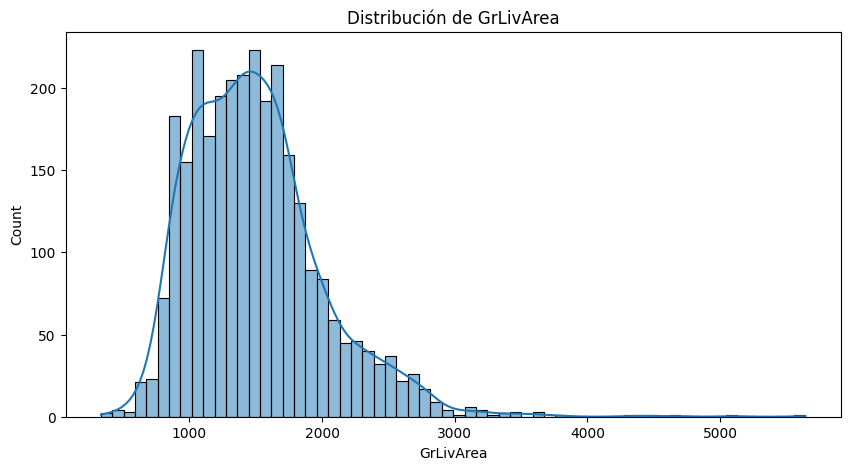

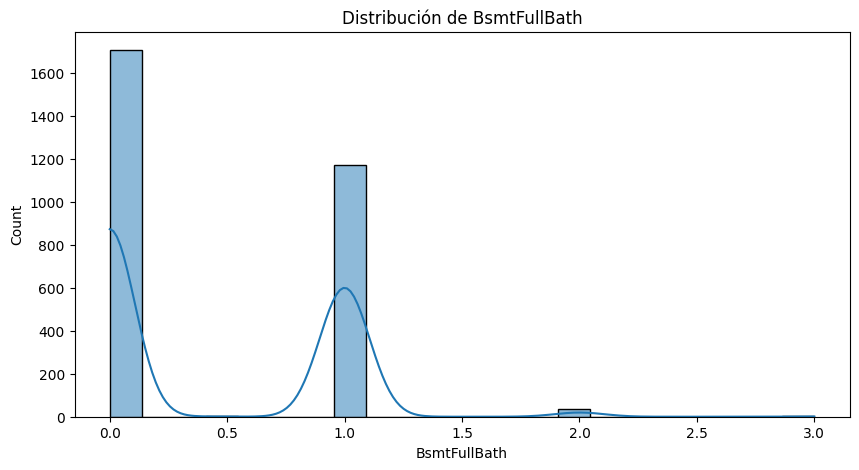

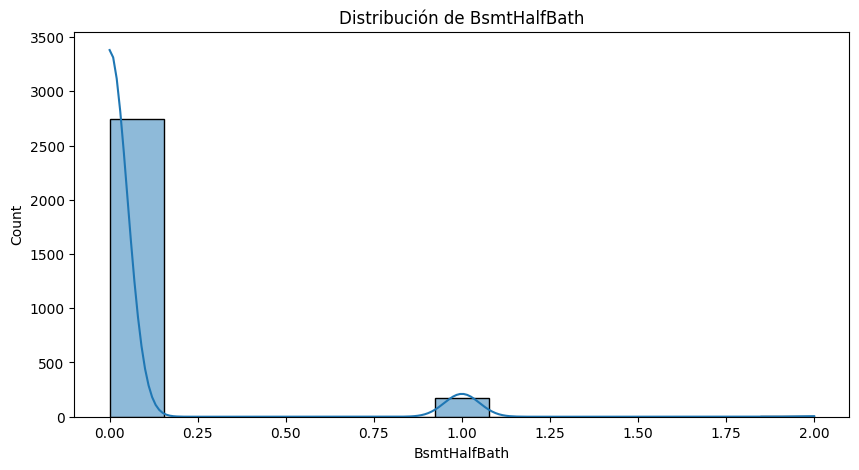

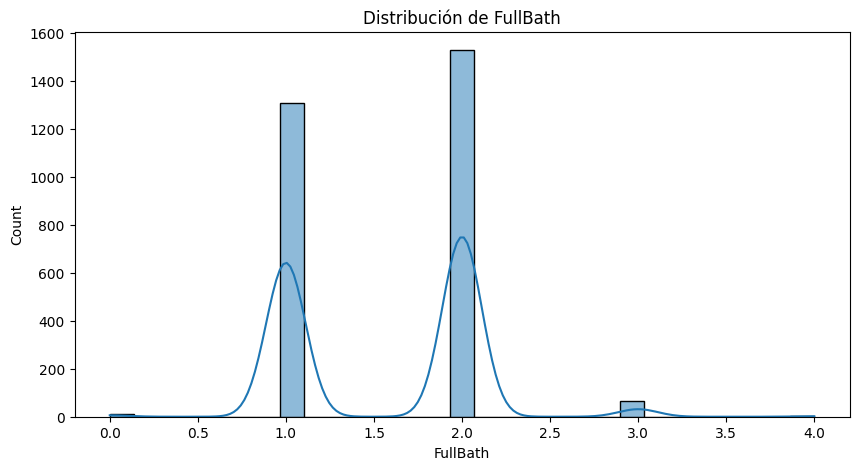

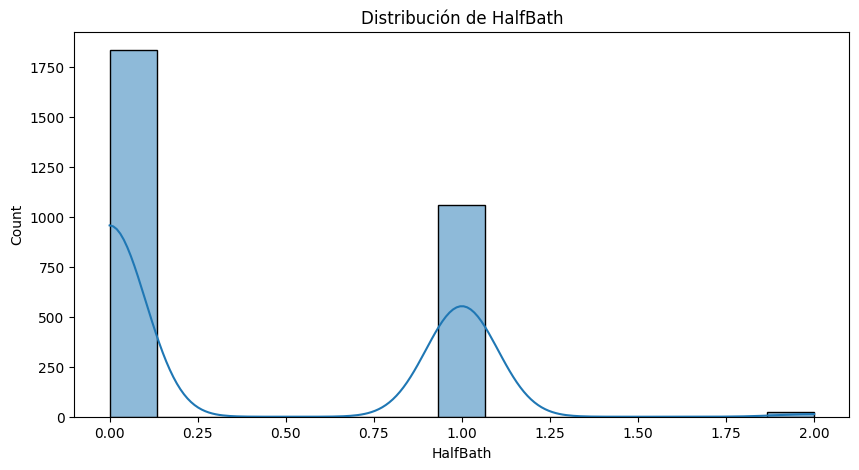

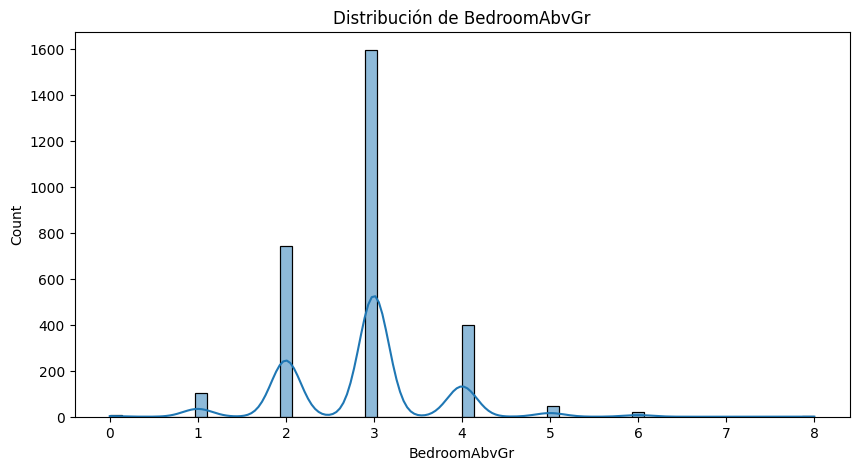

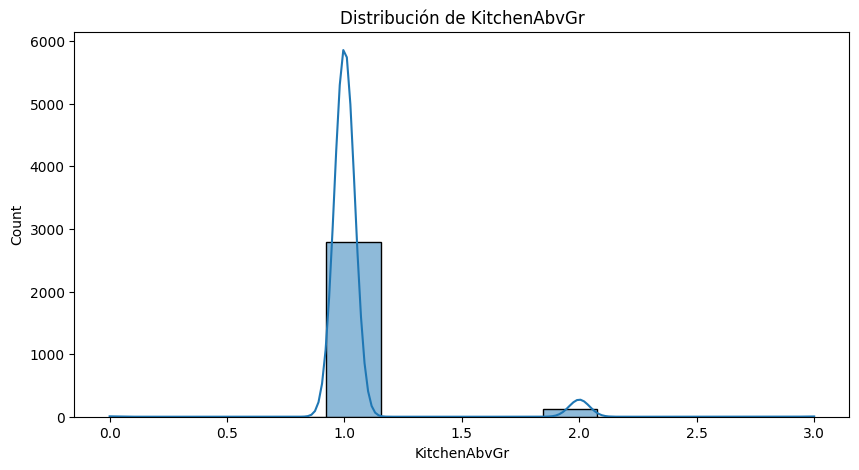

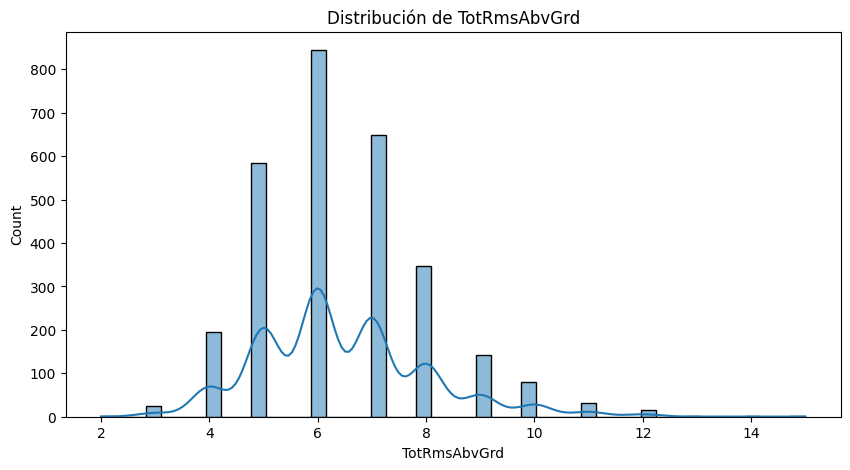

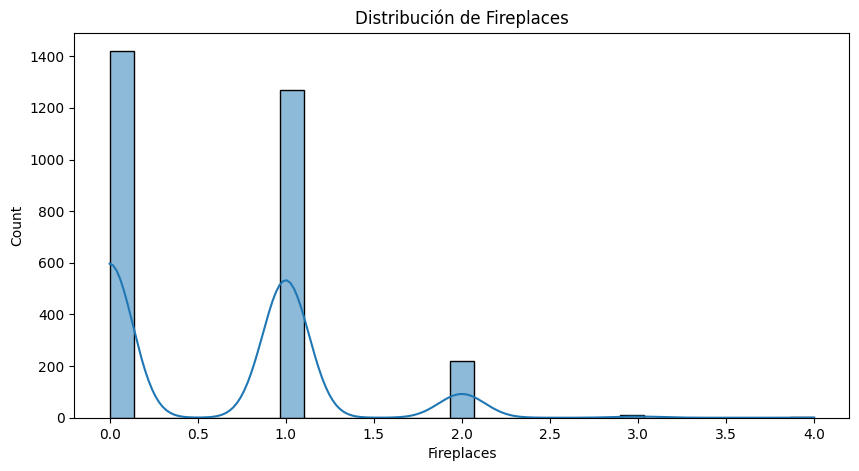

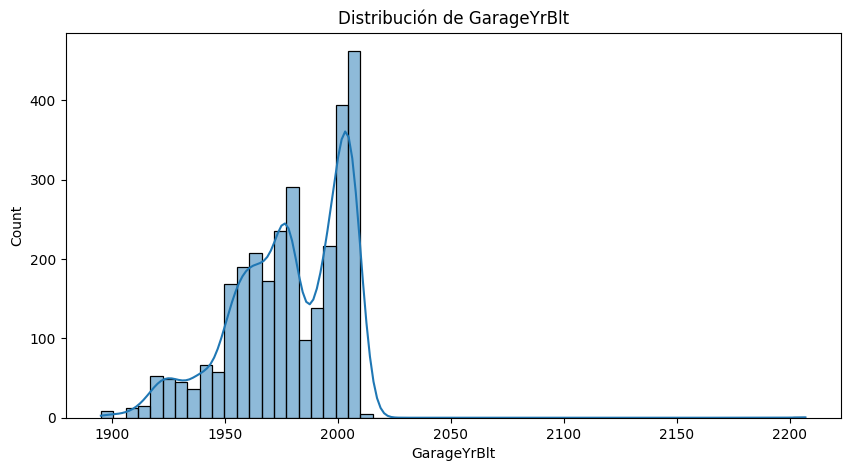

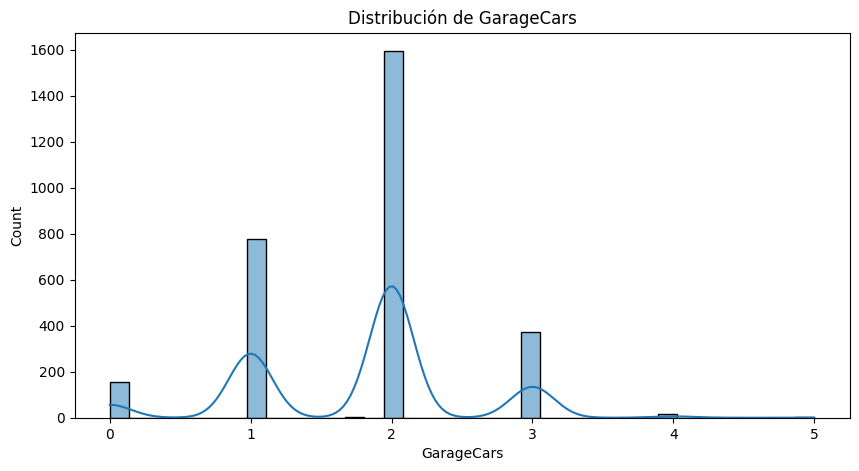

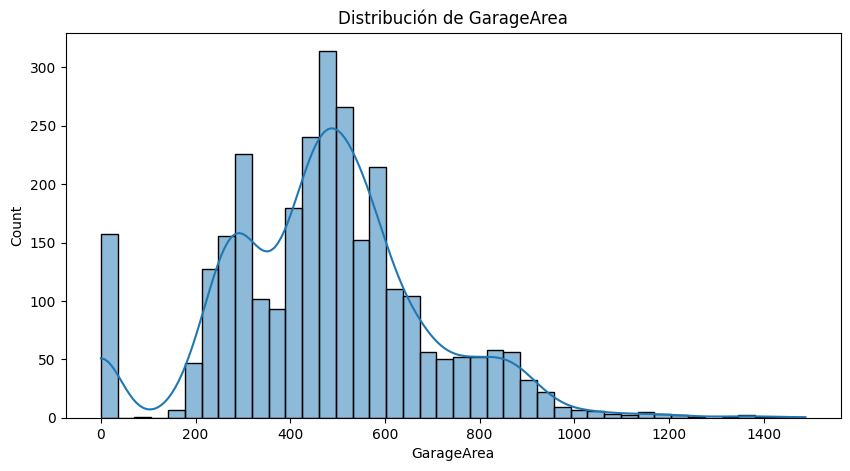

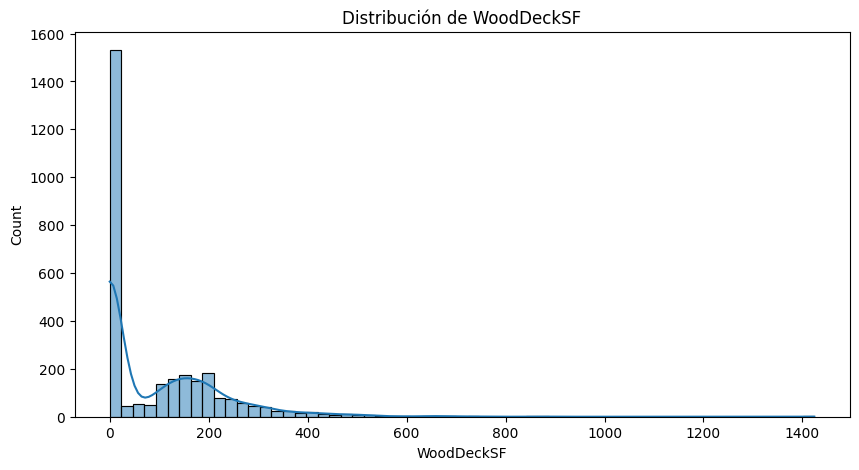

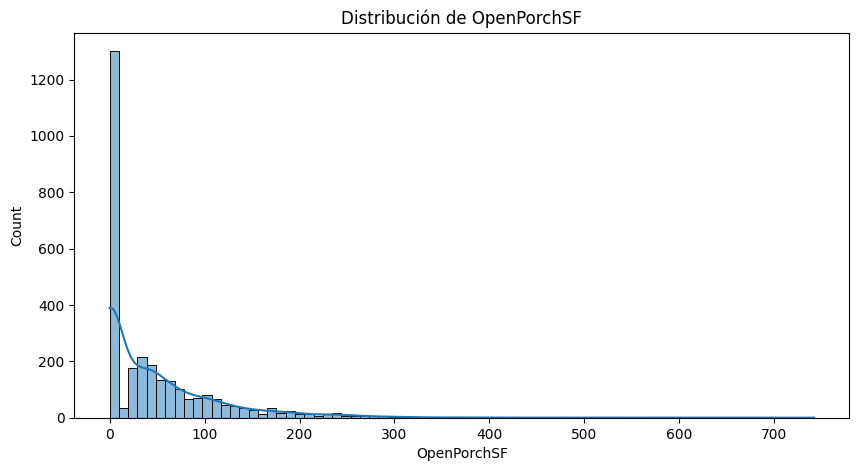

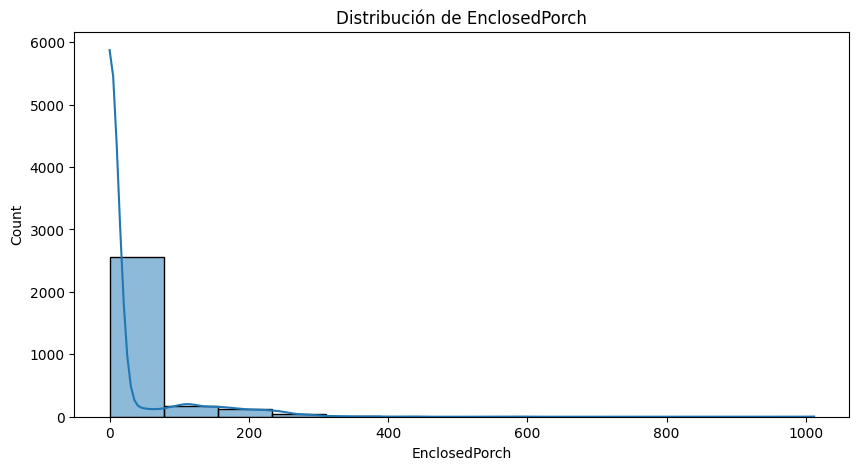

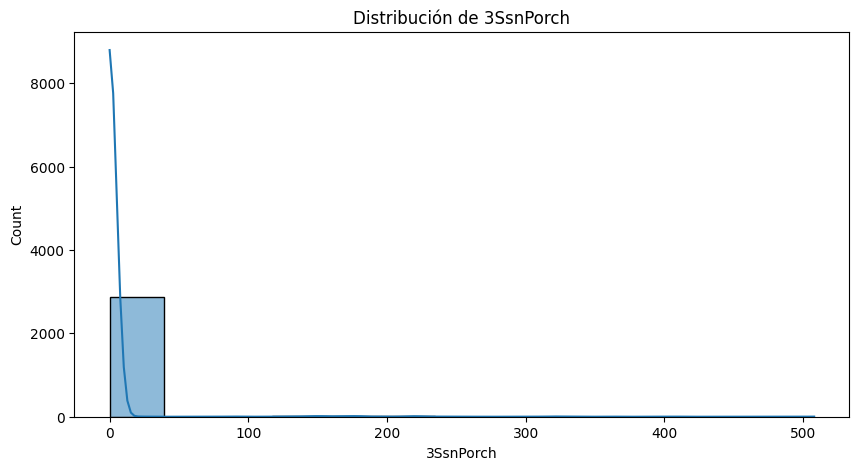

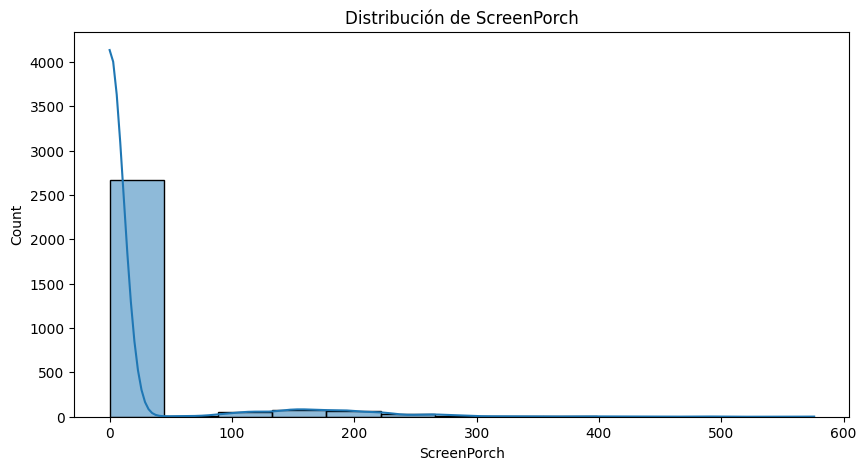

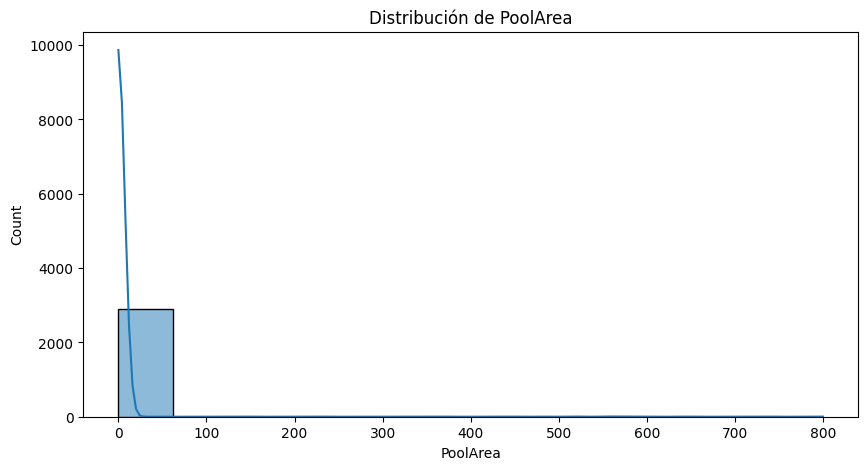

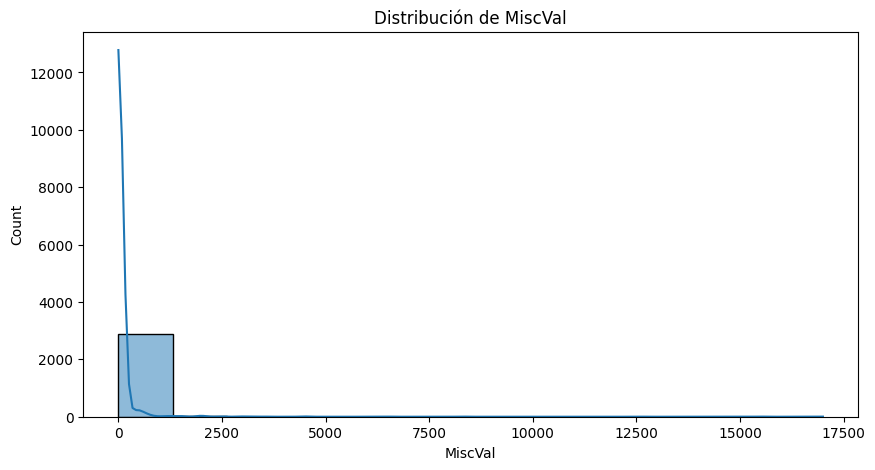

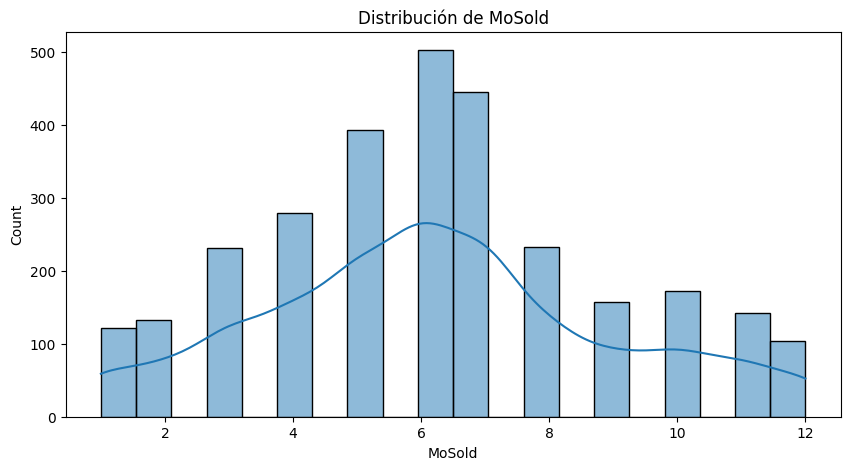

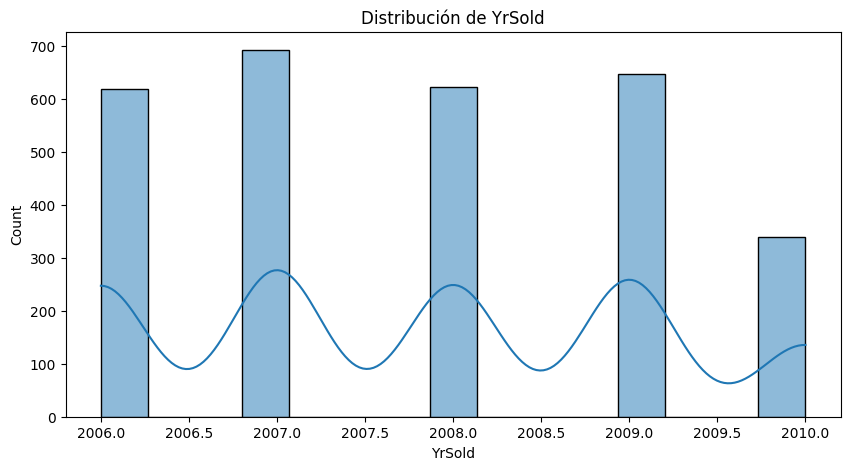

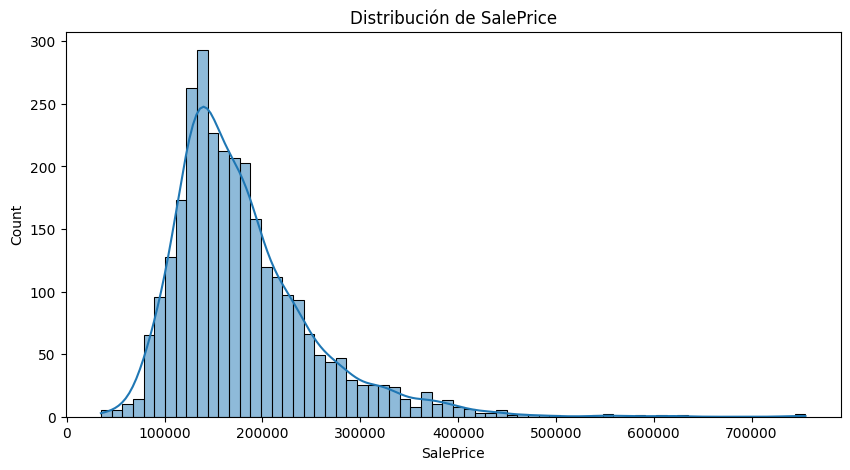

In [33]:
for col in numeric_vars.columns: 
    plt.figure(figsize=(10, 5))
    sns.histplot(numeric_vars[col].dropna(), kde=True) 
    plt.title('Distribución de ' + col)
    plt.show()

In [34]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000000,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.000000,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000000,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000000,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000000,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Attchd,1978.113406,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,92200.0
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.000000,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,95500.0
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.000000,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,182100.0
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,Attchd,1978.113406,Un

### Correlaciones

In [35]:
corr_matrix = df_encoded.corr()
high_corr_var = []
threshold = 0.7

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            rowname = corr_matrix.index[j]
            high_corr_var.append((rowname, colname))

for var_pair in high_corr_var:
    print(f"{var_pair[0]} and {var_pair[1]} are highly correlated")


MSSubClass and BldgType are highly correlated
Exterior1st and Exterior2nd are highly correlated
BsmtFinType2 and BsmtFinSF2 are highly correlated
TotalBsmtSF and 1stFlrSF are highly correlated
GrLivArea and TotRmsAbvGrd are highly correlated
YearBuilt and GarageYrBlt are highly correlated
GarageCars and GarageArea are highly correlated
OverallQual and SalePrice are highly correlated
GrLivArea and SalePrice are highly correlated


### Outliers

In [36]:
from scipy.stats import zscore

def find_outliers_with_zscore(df, threshold=3):
    z_scores = df.apply(zscore)
    outlier_cols = z_scores.columns[((z_scores < -threshold) | (z_scores > threshold)).any()].tolist()
    return outlier_cols

outlier_columns = find_outliers_with_zscore(df_encoded)

for col in outlier_columns:
    print(f"{col} has outliers")

MSSubClass has outliers
MSZoning has outliers
LotFrontage has outliers
LotArea has outliers
Street has outliers
LandContour has outliers
Utilities has outliers
LandSlope has outliers
Condition1 has outliers
Condition2 has outliers
OverallQual has outliers
OverallCond has outliers
YearBuilt has outliers
RoofStyle has outliers
RoofMatl has outliers
Exterior1st has outliers
MasVnrArea has outliers
ExterQual has outliers
ExterCond has outliers
Foundation has outliers
BsmtCond has outliers
BsmtFinSF1 has outliers
BsmtFinType2 has outliers
BsmtFinSF2 has outliers
BsmtUnfSF has outliers
TotalBsmtSF has outliers
Heating has outliers
CentralAir has outliers
Electrical has outliers
1stFlrSF has outliers
2ndFlrSF has outliers
LowQualFinSF has outliers
GrLivArea has outliers
BsmtFullBath has outliers
BsmtHalfBath has outliers
FullBath has outliers
HalfBath has outliers
BedroomAbvGr has outliers
KitchenAbvGr has outliers
TotRmsAbvGrd has outliers
Functional has outliers
Fireplaces has outliers
Gara

In [37]:
#Crear una función para ver la cantidad de outliers que hay en nuestro dataset
def outliers1 (df):
    for columnas in df:
        Q1 = df[columnas].quantile(0.25)
        Q3 = df[columnas].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[columnas][(df[columnas] < outlierIzq) | (df[columnas] > outlierDer)]
        print("La variable " + columnas + " tiene " + str(len(outliers)) + " valores outliers")

    
outliers1(df_encoded)

La variable MSSubClass tiene 207 valores outliers
La variable MSZoning tiene 650 valores outliers
La variable LotFrontage tiene 260 valores outliers
La variable LotArea tiene 128 valores outliers
La variable Street tiene 12 valores outliers
La variable LotShape tiene 0 valores outliers
La variable LandContour tiene 297 valores outliers
La variable Utilities tiene 1 valores outliers
La variable LotConfig tiene 0 valores outliers
La variable LandSlope tiene 141 valores outliers
La variable Neighborhood tiene 0 valores outliers
La variable Condition1 tiene 408 valores outliers
La variable Condition2 tiene 30 valores outliers
La variable BldgType tiene 494 valores outliers
La variable HouseStyle tiene 0 valores outliers
La variable OverallQual tiene 4 valores outliers
La variable OverallCond tiene 252 valores outliers
La variable YearBuilt tiene 9 valores outliers
La variable YearRemodAdd tiene 0 valores outliers
La variable RoofStyle tiene 609 valores outliers
La variable RoofMatl tiene 4

In [38]:
#Creamos una lista de las columnas con outliers
Outliers = [] 
def outliers2 (df):
    for columnas in df:
        Q1 = df[columnas].quantile(0.25)
        Q3 = df[columnas].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[columnas][(df[columnas] < outlierIzq) | (df[columnas] > outlierDer)]
        if len(outliers)> 0:
            Outliers.append(columnas)
            print("La variable " + columnas + " tiene " + str(len(outliers)) + " valores outliers: ")
            print(outliers)

outliers2(df_encoded)

La variable MSSubClass tiene 207 valores outliers: 
9       190
48      190
56      160
75      180
87      160
       ... 
2910    160
2912    160
2913    160
2914    160
2915    160
Name: MSSubClass, Length: 207, dtype: int64
La variable MSZoning tiene 650 valores outliers: 
8       4
15      4
21      4
23      4
29      4
       ..
2910    4
2912    4
2913    4
2914    4
2915    4
Name: MSZoning, Length: 650, dtype: int64
La variable LotFrontage tiene 260 valores outliers: 
25      110.0
35      108.0
36      112.0
41      115.0
52      110.0
        ...  
2912     21.0
2913     21.0
2914     21.0
2915     21.0
2916    160.0
Name: LotFrontage, Length: 260, dtype: float64
La variable LotArea tiene 128 valores outliers: 
53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
2880    21780
2896    23580
2900    50102
2904    31250
2916    20000
Name: LotArea, Length: 128, dtype: int64
La variable Street tiene 12 valores outliers: 
52      0
335     0
582  

In [39]:
def reemplazar_outliers_iqr(df, columnas):
    """
    Reemplazamos los outliers del  df usando el método IQR. 
    """
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
        df[columna] = np.where(df[columna] < (Q1 - 1.5 * IQR), Q1, df[columna])
        df[columna] = np.where(df[columna] > (Q3 + 1.5 * IQR), Q3, df[columna])
        
    return df

In [40]:
df_limpio = reemplazar_outliers_iqr(df_encoded, Outliers)

In [41]:
df_limpio

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.0,8450.0,1.0,3,3.0,0.0,4,0.0,5,2.0,2.0,0.0,5,7.0,5.0,2003.0,2003,1.0,1.0,12.0,13.0,1,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2,706.0,5.0,0.0,150.0,856.0,1.0,0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1,3.0,1.0,2.0,8.0,6.0,0.0,1,2003.000000,1,2.0,548.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2,2008,8.0,4.0,208500.0
1,20.0,3.0,80.0,9600.0,1.0,3,3.0,0.0,2,0.0,24,2.0,2.0,0.0,2,6.0,6.0,1976.0,1976,1.0,1.0,8.0,8.0,2,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0,978.0,5.0,0.0,284.0,1262.0,1.0,0,1.0,4.0,1262.0,0.0,0.0,1262.0,0.0,0.0,2.0,0,3.0,1.0,3.0,6.0,6.0,1.0,1,1976.000000,1,2.0,460.0,4.0,4.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2007,8.0,4.0,181500.0
2,60.0,3.0,68.0,11250.0,1.0,0,3.0,0.0,4,0.0,5,2.0,2.0,0.0,5,7.0,5.0,2001.0,2002,1.0,1.0,12.0,13.0,1,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2,486.0,5.0,0.0,434.0,920.0,1.0,0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1,3.0,1.0,2.0,6.0,6.0,1.0,1,2001.000000,1,2.0,608.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9,2008,8.0,4.0,223500.0
3,70.0,3.0,60.0,9550.0,1.0,0,3.0,0.0,0,0.0,6,2.0,2.0,0.0,5,7.0,5.0,1915.0,1970,1.0,1.0,13.0,15.0,2,0.0,3.0,4.0,0.0,3.0,3.0,3.0,0,216.0,5.0,0.0,540.0,756.0,1.0,2,1.0,4.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0,3.0,1.0,2.0,7.0,6.0,1.0,5,1998.000000,2,3.0,642.0,4.0,4.0,2.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2,2006,8.0,4.0,140000.0
4,60.0,3.0,84.0,14260.0,1.0,0,3.0,0.0,2,0.0,15,2.0,2.0,0.0,5,8.0,5.0,2000.0,2000,1.0,1.0,12.0,13.0,1,350.0,2.0,4.0,2.0,2.0,3.0,2.0,2,655.0,5.0,0.0,490.0,1145.0,1.0,0,1.0,4.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1,4.0,1.0,2.0,9.0,6.0,1.0,1,2000.000000,1,3.0,836.0,4.0,4.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12,2008,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,70.0,3.0,60.0,1936.0,1.0,3,3.0,0.0,4,0.0,10,2.0,2.0,0.0,5,4.0,7.0,1970.0,1970,1.0,1.0,5.0,5.0,2,0.0,3.0,4.0,1.0,3.0,3.0,3.0,5,0.0,5.0,0.0,546.0,546.0,1.0,2,1.0,4.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1,3.0,1.0,3.0,5.0,6.0,0.0,1,1978.113406,2,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2006,8.0,4.0,92200.0
2915,70.0,3.0,60.0,1894.0,1.0,3,3.0,0.0,4,0.0,10,2.0,2.0,0.0,5,4.0,5.0,1970.0,1970,1.0,1.0,5.0,5.0,2,0.0,3.0,4.0,1.0,3.0,3.0,3.0,4,252.0,5.0,0.0,294.0,546.0,1.0,4,1.0,4.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1,3.0,1.0,3.0,6.0,6.0,0.0,4,1970.000000,2,1.0,286.0,4.0,4.0,2.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4,2006,8.0,4.0,95500.0
2916,20.0,3.0,78.0,11570.0,1.0,3,3.0,0.0,4,0.0,11,2.0,2.0,0.0,2,5.0,7.0,1960.0,1996,1.0,1.0,12.0,13.0,2,0.0,3.0,4.0,1.0,3.0,3.0,3.0,0,1224.0,5.0,0.0,0.0,1224.0,1.0,0,1.0,4.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0,4.0,1.0,3.0,7.0,6.0,1.0,5,1960.000000,2,2.0,576.0,4.0,4.0,2.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,9,2006,8.0,4.0,182100.0
2917,85.0,3.0,62.0,10441.0,1.0,3,3.0,0.0,4,0.0,11,2.0,2.0,0.0,6,5.0,5.0,1992.0,1992,1.0,1.0,6.0,15.0,2,0.0,3.0,4.0,2.0,2.0,3.0,2.0,2,337.0,5.0,0.0,575.0,912.0,1.0,4,1.0,4.0,970.0,0.0,0.0,970.0,0.0,0.0,1.0,0,3.0,1.0,3.0,6.0,6.0,0.0,1,1978.113406,2,0.0,0.0,4.0,4.0,2.0,80.0,32.0,0.0,0.0,0.0,0.0,0.0,7,20

In [42]:
#guardamos nuestro df 
df_limpio.to_csv('df_limpio.csv', header=True, index=False) 